In [1]:
#import the basic libraries
import numpy as np
import pickle
import matplotlib.pyplot as plt


In [2]:

def seir_plot(res):
    """ Plots the epidemiological curves
    Parameters:
        res: [3D matrix, compartment_id]
    """
    plt.plot(res[::12, 0], color='r', label='S') # Take every 12 value to get steps per day (beacause of 2-hours intervals) 
    plt.plot(res[::12, 1], color='g', label='E')
    plt.plot(res[::12, 2], color='b', label='I')
    plt.plot(res[::12, 3], color='y', label='R')
    plt.plot(res[::12, 4], color='c', label='H')
    plt.legend()
    plt.show()

In [41]:
import pandas as pd
data = pd.read_json('data_norway/Basisdata_0000_Norge_25833_Fylker_GEOJSON.geojson')

coordinates = {}
for fylke in data["administrative_enheter.fylke"].loc["features"]:
    corodinates = fylke["geometry"]["coordinates"]
    fylkesnummer = fylke['properties']['fylkesnummer']
    navn = fylke["properties"]["navn"][0]["navn"]
    coordinates[(navn, fylkesnummer)] = coordinates


In [38]:
from numpy import savetxt
# load OD matrices
pkl_file = open('Data/Yerevan_OD_matrices.pkl', 'rb') # change to your desired directory
OD_matrices = pickle.load(pkl_file)
pkl_file.close()
print(OD_matrices.shape)
print(OD_matrices[2,:,:].shape)

data = np.round(OD_matrices[2,:,:], decimals=2)
savetxt("OD_ts_2.csv", data, delimiter=',')

(84, 549, 549)
(549, 549)


In [4]:
np.set_printoptions(suppress=True, precision=3) # Set number of decimals to 3

# load population densities
pkl_file = open('Data/Yerevan_population.pkl', 'rb')
pop = pickle.load(pkl_file)
pkl_file.close()
print(pop[0])
print(pop.shape)
print(pop)

[    0.        0.        0.        0.        0.        0.        0.
     0.      506.308     0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.     4430.193     0.
     0.        0.        0.        0.        0.        0.        0.
  1898.654     0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.      970.423     0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.     4556.77   5569.385
  5527.193     0.        0.        0.      759.462     0.        0.
     0.        0.        0.        0.        

In [5]:
pop[13] == pop[1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [6]:
# set up model
%run virus-sim.py

r = OD_matrices.shape[0]
n = pop.shape[1]
N = 1000000.0

initialInd = [334, 353, 196, 445, 162, 297] # Muncipalities that is initially infected
initial = np.zeros(n)
initial[initialInd] = 50  

model = Param(R0=2.4, DE= 5.6 * 12, DI= 5.2 * 12, I0=initial, HospitalisationRate=0.1, HospitalIters=15*12)

In [7]:
# run simulation
%run virus-sim.py

alpha = np.ones(OD_matrices.shape)
iterations = 3000
res = {}  # dictionary where the results for different cases will be found
inf = 50
res['baseline'] = seir(model, pop, OD_matrices, alpha, iterations, inf)  #baseline == no quarantine

Max number of hospitalised people:  32416 
 Day with max hospitalised people:  79


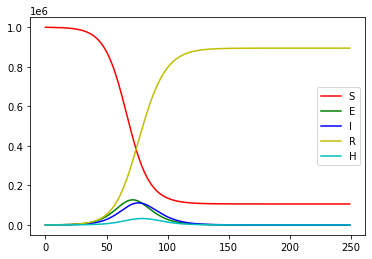

In [8]:
print("Max number of hospitalised people: ", int(res["baseline"][0][:,4].max()),
"\n",
"Day with max hospitalised people: ", int(res["baseline"][0][:,4].argmax()/12))
# plot result
seir_plot(res["baseline"][0])

## Spatial Visualisation

In [9]:
# import libraries
import pandas as pd
import geopandas as gpd
import contextily as ctx

In [10]:
from pyproj import CRS
crs = CRS.from_epsg(4326)

In [11]:
# load Yerevan grid file
yerevan_gdf = gpd.read_file("Yerevan grid shapefile/Yerevan.shp")
yerevan_gdf.crs = {'init':'epsg:4326'}   # Data saved as ESPG lat long
yerevan_gdf.crs = crs
yerevan_gdf.head()
print(yerevan_gdf.head())

   FID                                           geometry
0    0  POLYGON ((44.41298 40.18969, 44.41155 40.19399...
1    1  POLYGON ((44.41772 40.18316, 44.41418 40.18603...
2    2  POLYGON ((44.42035 40.18107, 44.42025 40.18110...
3    3  POLYGON ((44.42598 40.17664, 44.42576 40.17920...
4    4  POLYGON ((44.42652 40.17009, 44.42598 40.17664...
/Users/sandernordeide/anaconda3/envs/epidemics/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [23]:
# convert to crs used by contextily
yerevan_gdf

yerevan_gdf_3857 = yerevan_gdf.to_crs(epsg=3857)  # Convert to epsg=3857 to use contextily
west, south, east, north = yerevan_gdf_3857.unary_union.bounds

In [24]:
# declare baseline array storing the dynamics of the compartments 
baseline = res['baseline'][1][::12, :, :]
print(baseline.shape)
print(baseline)

(250, 5, 549)
[[[  0.      0.      0.    ... 717.269   0.      0.   ]
  [  0.      0.      0.    ...   0.      0.      0.   ]
  [  0.      0.      0.    ...   0.      0.      0.   ]
  [  0.      0.      0.    ...   0.      0.      0.   ]
  [  0.      0.      0.    ...   0.      0.      0.   ]]

 [[  0.      0.      0.    ... 654.597   0.      0.   ]
  [  0.      0.      0.    ...   0.032   0.      0.   ]
  [  0.      0.      0.    ...   0.062   0.      0.   ]
  [  0.      0.      0.    ...   0.013   0.      0.   ]
  [  0.      0.      0.    ...   0.      0.      0.   ]]

 [[  0.      0.      0.    ... 637.726   0.      0.   ]
  [  0.      0.      0.    ...   0.076   0.      0.   ]
  [  0.      0.      0.    ...   0.085   0.      0.   ]
  [  0.      0.      0.    ...   0.036   0.      0.   ]
  [  0.      0.      0.    ...   0.      0.      0.   ]]

 ...

 [[  0.      0.      0.    ...  67.659   0.      0.   ]
  [  0.      0.      0.    ...   0.      0.      0.   ]
  [  0.      0.      0

In [25]:
# declare hopsitalisation array storing the dynamics of the hospitalised 
hosp = res['baseline'][0][::12, 4]
print(hosp.shape)
print(hosp)

(250,)
[    0.        0.757     3.483     7.7      13.118    19.596    27.087
    35.587    45.143    55.847    67.806    81.151    96.03    112.618
   131.073   151.599   173.694   196.413   220.53    246.66    275.321
   306.895   341.812   380.56    423.604   471.448   524.636   583.793
   649.429   722.252   803.152   892.995   992.746  1103.452  1226.325
  1362.317  1512.779  1679.399  1863.785  2067.698  2293.014  2541.88
  2815.833  3117.136  3448.604  3812.737  4212.182  4649.614  5128.004
  5648.903  6214.982  6829.561  7494.94   8213.236  8986.111  9815.182
 10699.039 11637.691 12631.444 13678.11  14774.571 15916.347 17098.275
 18310.363 19544.701 20793.275 22044.421 23285.716 24503.606 25684.541
 26810.69  27868.821 28846.587 29729.223 30503.786 31158.618 31684.462
 32070.733 32314.296 32413.794 32367.096 32175.767 31843.77  31377.84
 30784.325 30076.036 29265.7   28364.325 27384.992 26341.207 25246.861
 24114.015 22957.623 21790.324 20621.849 19461.923 18319.175 17201.26
 1

In [16]:
# find maximum hospitalisation value to make sure the color intensities in the animation are anchored against it
max_exp_ind = np.where(baseline[:, 1, :] == baseline[:, 1, :].max())[0].item()
max_exp_val = baseline[:, 1, :].max()
print(max_exp_ind, max_exp_val)

73 3192.34059762395


(256, 4)
[[1.    0.961 0.941 1.   ]
 [1.    0.958 0.937 1.   ]
 [1.    0.956 0.934 1.   ]
 ...
 [0.419 0.004 0.053 1.   ]
 [0.412 0.002 0.052 1.   ]
 [0.404 0.    0.051 1.   ]]


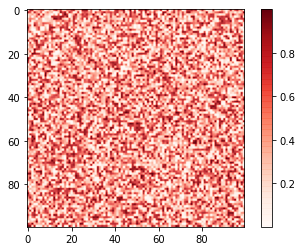

In [17]:
ncolors = 256
# get cmap
color_array = plt.get_cmap('Reds')(range(ncolors))
print(color_array.shape)
print(color_array)

# change alpha values
color_array[:, -1] = np.linspace(0.3, 1, ncolors)

# create colormap object
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap

map_object = LinearSegmentedColormap.from_list(name="Reds_transp", colors=color_array)

# register the colormap object
plt.register_cmap(cmap=map_object)

# plot some example data
fig, ax = plt.subplots()
h = ax.imshow(np.random.rand(100,100), cmap='Reds_transp')
plt.colorbar(mappable=h)

In [18]:
print(color_array)

[[1.    0.961 0.941 0.3  ]
 [1.    0.958 0.937 0.303]
 [1.    0.956 0.934 0.305]
 ...
 [0.419 0.004 0.053 0.995]
 [0.412 0.002 0.052 0.997]
 [0.404 0.    0.051 1.   ]]


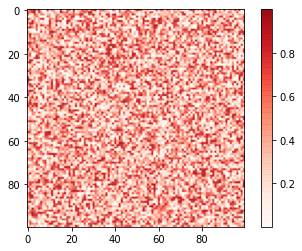

In [19]:
def trunc_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list('trunc({n}, {a:.2f}, {b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
                                                cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('Reds_transp')
new_cmap = trunc_colormap(cmap, 0.0, .9)

# plot some example data
fig, ax = plt.subplots()
h = ax.imshow(np.random.rand(100,100), cmap=new_cmap)
plt.colorbar(mappable=h)

In [20]:
print("baseline dimensions: ", baseline.shape)
print("hosp dimensions: ", hosp.shape)

baseline dimensions:  (250, 5, 549)
hosp dimensions:  (250,)


In [21]:
baseline[0, 1, :]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [6]:
params = {"axes.labelcolor":"slategrey"}
plt.rcParams.update(params)
cmap = plt.cm.get_cmap("Blues")
blue = cmap(200)

from tqdm import notebook

for time_step in notebook.tqdm(range(1,251)):
    
    yerevan_gdf_3857['exposed'] = baseline[time_step-1, 1, :]
    
    #plot
    fig, ax = plt.subplots(figsize=(14,14), dpi=72)
    yerevan_gdf_3857.loc[yerevan_gdf_3857.index==84, 'exposed'] = max_exp_val + 1
    yerevan_gdf_3857.plot(ax=ax, facecolor='none', edgecolor='gray', alpha=0.5, linewidth=0.5, zorder=2)
    yerevan_gdf_3857.plot(ax=ax, column='exposed', cmap=new_cmap, zorder=3)
    # add background
    ctx.add_basemap(ax, attribution="", url=ctx.sources.ST_TONER_LITE, zoom='auto', alpha=0.6)
    
    ax.set_xlim(west, east)
    ax.set_ylim(south, north)
    ax.axis('off')
    plt.tight_layout()
    
    inset_ax = fig.add_axes([0.6, 0.14, 0.37, 0.27])
    inset_ax.patch.set_alpha(0.5)
    
    inset_ax.plot(baseline[:time_step, 0].sum(axis=1), label="susceptible", color=blue, ls='-', lw=1.5, alpha=0.8)
    inset_ax.plot(baseline[:time_step, 1].sum(axis=1), label="exposed", color='g', ls='-', lw=1.5, alpha=0.8)
    inset_ax.plot(baseline[:time_step, 2].sum(axis=1), label="infectious", color='r', ls='-', lw=1.5, alpha=0.8)
    inset_ax.plot(baseline[:time_step, 3].sum(axis=1), label="recovered", color='y', ls='-', lw=1.5, alpha=0.8)
    inset_ax.plot(hosp[:time_step], label="hospitalised", color='purple', ls='-', lw=1.5, alpha=0.8)
    
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 0].sum(), color=blue, s=50, alpha=0.2)
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 1].sum(), color='g', s=50, alpha=0.2)
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 2].sum(), color='r', s=50, alpha=0.2)
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 3].sum(), color='y', s=50, alpha=0.2)
    inset_ax.scatter((time_step-1), hosp[(time_step-1)], color='purple', s=50, alpha=0.2)
    
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 0].sum(), color=blue, s=20, alpha=0.8)
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 1].sum(), color='g', s=20, alpha=0.8)
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 2].sum(), color='r', s=20, alpha=0.8)
    inset_ax.scatter((time_step-1), baseline[(time_step-1), 3].sum(), color='y', s=20, alpha=0.8)
    inset_ax.scatter((time_step-1), hosp[(time_step-1)], color='purple', s=20, alpha=0.8)
    
    inset_ax.fill_between(np.arange(0, time_step), np.maximum(baseline[:time_step, 0].sum(axis=1), \
                                                             baseline[:time_step, 3].sum(axis=1)), alpha=0.035, color='r')
    inset_ax.plot([time_step, time_step], [0, max(baseline[(time_step-1), 0].sum(), \
                                              baseline[(time_step-1), 3].sum())], ls='--', lw=0.7, alpha=0.8, color='r')
    
    inset_ax.set_ylabel('Population', size=18, alpha=1, rotation=90)
    inset_ax.set_xlabel('Days', size=18, alpha=1)
    inset_ax.yaxis.set_label_coords(-0.15, 0.55)
    inset_ax.tick_params(direction='in', size=10)
    inset_ax.set_xlim(-4, 254)
    inset_ax.set_ylim(-24000, 1024000)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    inset_ax.grid(alpha=0.4)
    
    inset_ax.spines['right'].set_visible(False)
    inset_ax.spines['top'].set_visible(False)
    
    inset_ax.spines['left'].set_color('darkslategrey')
    inset_ax.spines['bottom'].set_color('darkslategrey')
    inset_ax.tick_params(axis='x', colors='darkslategrey')
    inset_ax.tick_params(axis='y', colors='darkslategrey')
    plt.legend(prop={'size':14, 'weight':'light'}, framealpha=0.5)
    
    plt.title("Yerevan Covid-19 spreading on day: {}".format(time_step), fontsize=18, color= 'dimgray')
    
    plt.savefig("Plots/flows_{}.jpg".format(time_step), dpi=fig.dpi)

NameError: name 'plt' is not defined

In [1]:
import re

def sort_in_order( l ):
    """ sorts a given iterable
    
    l : iterable to be sorted"""
    
    convert = lambda text: int(text) if text.isdigit() else text
    alphanumeric_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanumeric_key)

from os import listdir

filenames = listdir("Plots/")
filenames = sort_in_order(filenames)
print(filenames)

['flows_1.jpg', 'flows_2.jpg', 'flows_3.jpg', 'flows_4.jpg', 'flows_5.jpg', 'flows_6.jpg', 'flows_7.jpg', 'flows_8.jpg', 'flows_9.jpg', 'flows_10.jpg', 'flows_11.jpg', 'flows_12.jpg', 'flows_13.jpg', 'flows_14.jpg', 'flows_15.jpg', 'flows_16.jpg', 'flows_17.jpg', 'flows_18.jpg', 'flows_19.jpg', 'flows_20.jpg', 'flows_21.jpg', 'flows_22.jpg', 'flows_23.jpg', 'flows_24.jpg', 'flows_25.jpg', 'flows_26.jpg', 'flows_27.jpg', 'flows_28.jpg', 'flows_29.jpg', 'flows_30.jpg', 'flows_31.jpg', 'flows_32.jpg', 'flows_33.jpg', 'flows_34.jpg', 'flows_35.jpg', 'flows_36.jpg', 'flows_37.jpg', 'flows_38.jpg', 'flows_39.jpg', 'flows_40.jpg', 'flows_41.jpg', 'flows_42.jpg', 'flows_43.jpg', 'flows_44.jpg', 'flows_45.jpg', 'flows_46.jpg', 'flows_47.jpg', 'flows_48.jpg', 'flows_49.jpg', 'flows_50.jpg', 'flows_51.jpg', 'flows_52.jpg', 'flows_53.jpg', 'flows_54.jpg', 'flows_55.jpg', 'flows_56.jpg', 'flows_57.jpg', 'flows_58.jpg', 'flows_59.jpg', 'flows_60.jpg', 'flows_61.jpg', 'flows_62.jpg', 'flows_63.jpg', 

In [7]:
import imageio
from tqdm import tqdm
with imageio.get_writer('Covid_19.gif', mode='I', fps=16) as writer:
    for filename in tqdm(filenames):
        image = imageio.imread('Plots/{}'.format(filename))
        writer.append_data(image)

100%|██████████| 250/250 [00:45<00:00,  5.51it/s]
